# Aula 15 - Prática com sklearn

**Índice**

  - [Configuração do *notebook*](#Configuração-do-notebook) 
  - [Carregando alguns dados](#Carregando-alguns-dados)
  - [Lidando com *outliers* e erros de entrada](#Lidando-com-outliers-e-erros-de-entrada)
  - [Trabalhando com valores ausentes](#Trabalhando-com-valores-ausentes)
  - [Treinando com o classificador Naive Bayes](#Treinando-com-o-classificador-Naive-Bayes)
  - [Validação com treinamento e teste](#Validação-com-treinamento-e-teste)

## Configuração do *notebook*

Execute a célula abaixo para dizer ao notebook onde encontrar os dados. Ela irá testar se o arquivo está presente.

In [ ]:
DATA_DIR = './'

try:
    f = open(DATA_DIR + "iris2.csv")
except IOError:
    print(f"O arquivo {DATA_DIR}iris2.csv não foi encontrado")
    print("Você fez o download do aquivo no ColabWeb?")
finally:
    f.close()

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">01</span></span></div>

> Execute a célula abaixo e selecione a resposta certa.

In [ ]:
type(np.array(1))

numpy.ndarray

## Carregando alguns dados

Vamos trabalhar com uma versão levemente modificada da base de dados Iris. Alguns valores estão ausentes e outros contêm erros de digitação.

**TODO**: Primeiro, carregue o arquivo `iris2.csv` como um *data frame*. Use a função `pd.read_csv`. Guarde o resultado na variável `iris`.

In [ ]:
iris = pd.read_csv(DATA_DIR + 'iris2.csv')

Se você fez corretamente, a célula abaixo deverá mostrar os nomes das variáveis: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' e 'species'.

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**TODO:** Use o método `describe` para obter uma descrição dos atributos numéricos da base.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,145.000000,146.000000,145.000000,149.000000
mean,5.848966,7.466438,3.641379,1.204698
std,0.837582,37.667566,1.972716,0.761962
min,4.300000,2.000000,-3.700000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,350.000000,6.900000,2.500000


<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">02</span></span></div>

> O atributo `petal_length` possui valores faltantes? Verifique a contagem retornada pelo método `describe`.

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">03</span></span></div>

> Qual atributo possui o maior desvio padrão?

In [ ]:
iris.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length     0.837582
sepal_width     37.667566
petal_length     1.972716
petal_width      0.761962
dtype: float64

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">04</span></span></div>

> Qual atributo possui um valor que parece estar fora do domínio?
>
> Lembre-se que os atributos representam medidas da flor em centímetros.

## Lidando com *outliers* e erros de entrada

Os dados podem conter *outliers*. São valores que fogem demais da média do conjunto. Podemos procurar por *outliers* verificando quais valores estão muitos desvios padrão distantes da média de cada atributo.

**TODO:** Obtenha o valor médio de cada atributo com o metodo `mean`.

In [ ]:
iris.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length    5.848966
sepal_width     7.466438
petal_length    3.641379
petal_width     1.204698
dtype: float64

**TODO:** Obtenha o desvio padrão com o método `std`.

In [ ]:
iris.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length     0.837582
sepal_width     37.667566
petal_length     1.972716
petal_width      0.761962
dtype: float64

Note o desvio padrão elevado do atributo `sepal_width`. Podemos inspecionar o *data frame* com histogramas para verificar se existe algo errado com este e os outros atributos.

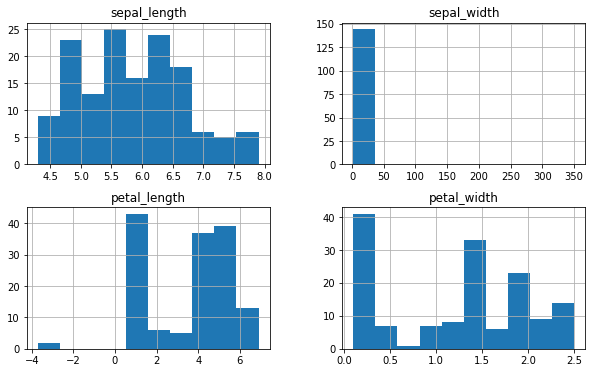

In [ ]:
iris.hist(figsize=(10,6), bins=10);

Note que o atributo `sepal_width` parece ter pelo menos um *outlier*. O intervalo de valores vai até 350, mas quase todos os exemplos estão concentrados na faixa 0~10.

O atributo `petal_length` tem pelo menos um valor negativo, o que é inesperado porque os atributos são dimensões físicas. Nós já havíamos observado isso antes com `iris.count()`.

Vamos olhar o atributo `sepal_width` mais de perto.

In [ ]:
np.histogram(iris['sepal_width'].dropna())

(array([144,   0,   0,   0,   0,   0,   0,   0,   1,   1]),
 array([  2. ,  36.8,  71.6, 106.4, 141.2, 176. , 210.8, 245.6, 280.4,
        315.2, 350. ]))

A saída de `np.histogram` é uma tupla com dois vetores NumPy. O segundo vetor contém sempre um elemento a mais que o primeiro. Juntos eles descrevem a distribuição de valores em uma amostra.

Por exemplo, se os dois vetores forem (indentação exagerada para demonstração)

```Python
    [    144,        2]
    [2,       176,     350]
```

Isso significa que 145 elementos da população têm valores no intervalo $[2, 176)$ e apenas 2 elemento têm valores no intervalo $[176, 300]$ (os intervalos são abertos à direita, exceto o último). Na verdade, se você olhar ainda mais de perto a distribuição de valores, verá que quase todos são menores que 5, com exceção de dois *outliers*.

Podemos identificar os *outlier* empregando a condição que econtramos sobre as linhas do *data frame*:

In [ ]:
iris[iris['sepal_width'] > 5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,350.0,1.4,0.2,setosa
149,5.9,300.0,5.1,1.8,virginica


Uma flor da espécie iris não pode ter a pétala com 300 centímetros de largura! Isso provavelmente é um erro de coleta. O melhor a se fazer é remover este exemplo.

Para obter os índices dos exemplos com valores incorretos, basta acessar o atributo `index` do *data frame* que a célula acima retornou.

In [ ]:
erros = iris[iris['sepal_width'] > 5].index
erros

Int64Index([0, 149], dtype='int64')

Usando esse índice com o método `drop`, podemos remover as linhas com erros de entrada de dados.

In [ ]:
iris.drop(erros, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,NaN,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


Podemos confirmar que os exemplos foram removidos empregando `describe` no atributo:

**TODO:** aplique o método `describe` na coluna do atributo `sepal_width`.

In [ ]:
iris['sepal_width'].describe()

count    144.00000
mean       3.05625
std        0.43222
min        2.00000
25%        2.80000
50%        3.00000
75%        3.30000
max        4.40000
Name: sepal_width, dtype: float64

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">05</span></span></div>

> Execute a célula abaixo e confirme que sobraram 148 exemplos. Se o valor for menor, então você provavelmente removeu os valores ausentes também.

In [ ]:
len(iris)

148

Havia também pelo menos um valor negativo no atributo `petal_length`. Use uma condição para descobrir quais exemplos contêm valor negativo nesse atributo e responder a próxima questão do Kahoot.

In [ ]:
iris[iris['petal_length'] < 0]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,-3.5,1.0,versicolor
81,5.5,2.4,-3.7,1.0,versicolor


<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">06</span></span></div>

> A quais espécies pertencem os exemplos que possuem valores negativos no atributo `petal_length`?

In [ ]:
iris[iris['petal_length'] < 0]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,-3.5,1.0,versicolor
81,5.5,2.4,-3.7,1.0,versicolor


Agora, vamos remover esses exemplos. Mas, antes de começar, vamos fazer uma cópia do *data frame* para o caso de cometermos algum erro.

In [ ]:
iris_copia = iris.copy()

Excelente.

Agora, usando o operador de negação `~` ou uma condição diferente, selecione apenas as linhas que possuem valores positivos para o atributo `petal_length`.

Copie essas linhas e despreze as outras. Depois encontre o valor do menor exemplo. Use a resposta para responder a próxima questão do Kahoot. Em caso de erro, execute a célula abaixo para recuperar o *data frame*.

In [ ]:
# iris = iris_copia.copy()

In [ ]:
# escreva sua resposta aqui
nega = iris[iris['petal_length'] < 0].index
nega

Int64Index([], dtype='int64')

In [ ]:
iris.drop(nega, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,NaN,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


Se você fez corretamente, a linha abaixo deve indicar que sobraram 141 exemplos.

In [ ]:
len(iris)

146

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">07</span></span></div>

> Qual o menor valor do atributo `petal_length` depois de remover os exemplos com valores negativos?

In [ ]:
iris[iris['petal_length'] < 1.2]

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
22,4.6,3.6,1.0,0.2,setosa


## Trabalhando com valores ausentes

Já lidamos com entradas que parecem incorretas. Mas ainda existem valores ausentes. Isso fica evidente porque `describe` retorna a contagem apenas para valores presentes e eles são diferentes para os atributos.

In [ ]:
iris['sepal_width'].count()

142

In [ ]:
iris['petal_width'].count()

145

Também podemos comparar o número de valores desses atributos com o número de linhas do *data frame*.

In [ ]:
len(iris) - iris['sepal_width'].count()

4

Existem 4 exemplos que possuem valores ausentes para esse atributo.

Os dados podem ter valores ausentes por diversos motivos:

- Houve erro durante a coleta;
- O processo de coleta é muito caro e não é possível obter informações completas para todos os exemplos;
- Alguns dados foram propositalmente removidos porque são sensíveis (*e.g.*, informação pessoal);
- etc.

Existem diferentes formas de lidar com valores ausentes. Uma delas é substituir os valores ausentes pela média dos valores presentes. A premissa disso é que o conjunto coletado é a melhor representação que temos do mundo real. Se não sabemos qual é o valor do atributo, podemos "chutar" na média.

O Pandas possui uma funcionalidade bem simples para substituir valores ausentes. Porém, antes de fazer isso, vamos verificar quais são os exemplos que têm valores ausentes.

O método `isna()` retorna, para cada célula, se o conteúdo é um valor real um valor ausente.

In [ ]:
iris.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,True,False,False,False,False
147,False,False,False,False,False


Já o método `any()` retorna `True` se *qualquer* valor da célula é verdadeiro. Ele é equivalente ao `numpy.any`. Se nós espeificarmos o eixo zero, então a operação será aplicada ao longo das linhas, retornando `True` se *qualquer* valor de uma linha tiver um valor ausente.

![image.png](attachment:image.png)

In [ ]:
iris.isna().any(axis=1)

1      False
2      False
3      False
4      False
5      False
       ...  
144    False
145    False
146     True
147    False
148    False
Length: 146, dtype: bool

Podemos usar esse resultado como uma máscara do *data frame*:

In [ ]:
iris[iris.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,NaN,setosa
16,NaN,3.9,1.3,0.4,setosa
21,5.1,NaN,1.5,0.4,setosa
30,4.8,3.1,NaN,0.2,setosa
31,5.4,NaN,1.5,0.4,setosa
36,NaN,3.5,1.3,0.2,setosa
59,5.2,NaN,3.9,1.4,versicolor
63,6.1,2.9,NaN,1.4,versicolor
68,6.2,NaN,4.5,1.5,versicolor
91,NaN,3.0,4.6,1.4,versicolor


Nice.

É importante verificar onde há valores ausentes. Nesse caso, cada exemplo tem no máximo um valor ausente. Exemplos que têm muitos valores ausentes podem representar erros graves de coleta. Nesse caso, pode ser melhor descartá-los. Além disso, ao observar o restante dos atributos de um exemplo com valores ausentes, podemos descobrir outros problemas nos dados. Nunca faça modificações nos dados sem analisar a situação primeiro.

Agora que já temos conhecimento dos dados, podemos substituir pelos valores médios. Para isso, basta usar o método `DataFrame.fillnae()`. Ele recebe como entrada os valores a substituírem os ausentes. Podemos passar um vetor contendo o valor médio de cada atributo e ele irá substituir corretamente cada média.

In [ ]:
iris.fillna(iris.mean(numeric_only=True), inplace=True)

Existe valor ausente em algum atributo agora?

In [ ]:
iris.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Como ficaram os dados?

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.00000,146.000000,146.000000
mean,5.862411,3.06831,3.749645,1.210345
std,0.828754,0.41645,1.755175,0.763271
min,4.300000,2.20000,1.000000,0.100000
25%,5.100000,2.80000,1.600000,0.300000
50%,5.800000,3.00000,4.200000,1.300000
75%,6.400000,3.30000,5.100000,1.800000
max,7.900000,4.40000,6.900000,2.500000


<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">08</span></span></div>

> Quantos exemplos restaram após o processamento?

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">09</span></span></div>

> Qual o valor médio do atributo `petal_length` após o processamento?

In [ ]:
iris.petal_length.mean()

3.7496453900709246

## Normalização / uniformização

Observe atentamente as médias e os desvios padrões dos atributos da base de dados Iris. Percebe alguma coisa?

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.00000,146.000000,146.000000
mean,5.862411,3.06831,3.749645,1.210345
std,0.828754,0.41645,1.755175,0.763271
min,4.300000,2.20000,1.000000,0.100000
25%,5.100000,2.80000,1.600000,0.300000
50%,5.800000,3.00000,4.200000,1.300000
75%,6.400000,3.30000,5.100000,1.800000
max,7.900000,4.40000,6.900000,2.500000


Existe uma pequena variação das distribuições dos atributos. O comprimento médio das sépalas das flores é 5,86cm, enquanto o comprimento médio das pétalas é 3,75cm.

Podemos observar um pouco mais atentamente se agruparmos a amostra pela classe e só depois aplicarmos o `describe`.

In [ ]:
iris.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  49.000000   48.000000  49.000000
             mean    5.020915    5.975517   6.593110
             std     0.385575    0.488138   0.641965
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.200000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.862411    7.000000   7.900000
sepal_width  count  49.000000   48.000000  49.000000
             mean    3.406870    2.819513   2.973469
             std     0.387237    0.285303   0.325817
             min     2.300000    2.200000   2.200000
             25%     3.100000    2.600000   2.800000
             50%     3.400000    2.900000   3.000000
             75%     3.600000    3.000000   3.200000
             max     4.400000    3.400000   3.800000
petal_length count  49.000000   48.000000  49.000000
             mean    1.507136    4.267701   5.484672
             std     0.370484    0.461100   0.696864
             min     1.000000    3.000000   3.749645
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.600000
             75%     1.600000    4.600000   5.900000
             max     3.749645    5.100000   6.900000
petal_width  count  49.000000   48.000000  49.000000
             mean    0.263476    1.339583   2.030612
             std     0.172805    0.189893   0.275533
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     1.210345    1.800000   2.500000

Em todo caso, os atributos são relativamente próximos. A base `iris` é realmente uma base bastante simples.

Em outros conjuntos, isso não necessariamente acontece. Pode haver atributos com escalas diferentes. Por exemplo, uma base hipotética pode conter os atributos `idade` (em anos) e `altura` (em metros).

In [ ]:
st = np.random.RandomState(seed=42)
hipot = pd.DataFrame(columns=['idade', 'altura', 'classe'], index=range(10))
hipot['idade'] = np.array(st.uniform(20, 25, (10,)), dtype=int)
hipot['altura'] = st.normal(1.7, 0.08, (10,))
hipot['classe'] = list('ABAABAAAAB')
hipot

,idade,altura,classe
0,21,1.662442,A
1,24,1.743405,B
2,23,1.662927,A
3,22,1.662742,A
4,20,1.719357,B
5,20,1.546938,A
6,20,1.562007,A
7,24,1.655017,A
8,23,1.618974,A
9,23,1.725140,B


In [ ]:
hipot.describe()

,idade,altura
count,10.000000,10.000000
mean,22.000000,1.655895
std,1.632993,0.065549
min,20.000000,1.546938
25%,20.250000,1.627984
50%,22.500000,1.662592
75%,23.000000,1.705249
max,24.000000,1.743405


O atributo `idade` tem variações muito maiores do que o atributo `altura`. Isso significa que as variações dos valores da amostra no atributo `idade` vão impactar muito mais o indutor do que as variações dos valores no atributo `altura`.

Para evitar que as escalas dos atributos afetem o processo de aprendizado, podemos normalizar os atributos. Por exemplo, com normalização-z ou normalização em um intervalo.

Na normalização-z, os atributos são redimensionados para terem média zero e desvio padrão 1, de acordo com a equação a seguir,

$$z_{i,j} = \frac{x_{i,j} - \overline{X_j}}{s(X_j)},$$

na qual $x_{i,j}$ é o $j$-ésimo atributo do exemplo $x_i$, $\overline{X_j}$ é o valor médio do atributo $X_j$ e $s(X_j)$ é o desvio padrão amostral do atributo $X_j$.

Na normalização em um intervalo, os atributos são redimensionados para todos estejam contidos em algum intervalo específico (tipicamente $[0,1]$). Isso é feito conforme a equação a seguir:

$$u_{i,j} = \frac{x_{i,j} - \min(X_j)}{\max(X_j) - \min(X_j)}$$

O sklearn possui a classe `sklearn.preprocessing.StandardScaler` para processar os atributos com normalização-z e `sklearn.preprocessing.MinMaxScaler` para normalizar a um intervalo específico.

Note que ambos são transformadores que possuem os métodos `fit` e `transform`. Quando estamos trabalhando com dados particionados, é importante que as médias, desvios padrões e valores máximos e mínimos sejam aprendidos no conjunto de treino e aplicados nos conjuntos de teste e validação.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = iris.iloc[: , :-1]

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
Xunic = scaler.transform(X)

In [ ]:
np.mean(Xunic, axis = 0)

array([0.43400315, 0.3946863 , 0.46604159, 0.46264368])

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">10</span></span></div>

> Qual é o valor médio do atributo `sepal_length` no conjunto uniformizado?

In [ ]:
iris.sepal_length.describe()

count    146.000000
mean       5.862411
std        0.828754
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

## Treinando com o classificador Naive Bayes

Em aula anterior, usamos o Naive Bayes categórico para efetuar classificação.

O Naive Bayes categóricos faz o cálculo das probabilidades supondo que os atributos seguem uma distribuição categórica. Isto é, quando chega um exemplo de uma classe qualquer, $c_j$, a probabilidade de observar um valor $x_i$ para algum atributo,

$$p(x_i | c_j),$$

é calculada com base na frequência com que valores $x_i$ foram observados, no conjunto de treinamento, para a classe $c_j$.

Esse método não é apropriado para valores contínuos, pois a probabilidade de se observar qualquer valor específico real é sempre zero.

O Naive Bayes gaussiano supõe que todos os atributos seguem uma distribuição gaussiana, com uma certa média e desvio padrão:

![image-3.png](attachment:image-3.png)

Fonte da figura: https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Normal_Distribution_PDF.svg

A média e o desvio padrão de cada atributo são estimados do conjunto de treinamento:

In [ ]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.020915,3.406870,1.507136,0.263476
versicolor,5.975517,2.819513,4.267701,1.339583
virginica,6.593110,2.973469,5.484672,2.030612


In [ ]:
iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.385575,0.387237,0.370484,0.172805
versicolor,0.488138,0.285303,0.461100,0.189893
virginica,0.641965,0.325817,0.696864,0.275533


Com base nesses valores, o Naive Bayes pode estimar a probabilidade de observar um valor específico:

$$p(x_i \mid c_j) = \frac{1}{\sqrt{2\pi\sigma^2_j}} \exp\left(-\frac{(x_i - \mu_j)^2}{2\sigma^2_j}\right)$$

Onde:

- $x_i$: um valor observado para o atributo
- $c_j$: uma classe para a qual queremos estimar a probabilidade
- $\sigma_j$: o desvio padrão, neste atributo, para os exemplos da classe
- $\mu_j$: a média, nesta atributo, para os exemplos da classe

Vamos começar separando os exemplos em características e classes.

In [ ]:
X = iris.iloc[:, :-1].values

In [ ]:
y = iris.iloc[:, -1].values

Agora, veja que o vetor de classes é composto por strings.

In [ ]:
type(y[0])

str

Use `LabelEncoder` para codificar essas strings em valores numéricos. Depois responda as próximas perguntas do Kahoot.

**TODO:** instancie um objeto da classe `LabelEncoder`

In [ ]:
from sklearn.preprocessing import LabelEncoder

**TODO**: "treine" o codificador nos rótulos.

**TODO**: faça a transformação dos rótulos. Sobrescreva a variável `y` com os rótulos codificados.

Se você fez corretamente, a próxima célula deverá imprimir uma mensagem de sucesso.

In [ ]:
contagem, _ = np.histogram(y, bins=3)
np.array_equal(contagem, [48, 47, 46])

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">12</span></span></div>

> Se a saída da célula anterior foi `True`, confirme no Kahoot para prosseguirmos.

Os próximos passos você já deve conhecer. Crie uma nova instancia do classificador `GaussianNB`, treine-o com `X` e `y`.

In [ ]:
from sklearn.naive_bayes import GaussianNB

**TODO:** instanciar um novo objeto da classe `GaussianNB`.

**TODO**: treine o modelo com os dados `X` e `y`.

**TODO**: faça a previsão para os próprios exemplos de treinamento.

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">12</span></span></div>

> Qual é a acurácia do modelo nos exemplos de treinamento?

**TODO**: usando o sklearn, calcule a acurácia no conjunto de treinamento.

In [ ]:
from sklearn.metrics import accuracy_score

## Validação com treinamento e teste

O erro empírico não é uma medida muito boa (nem a "acurácia empírica", a propósito). Em vez disso, podemos fazer uma separação dos exemplos em um conjunto de treinamento e um conjunto de teste. Esse tipo de procedimento é chamado ***hold-out***, termo em inglês que significa algo como "deixar de fora". No *hold-out*, nós "deixamos de fora" alguns exemplos da nossa amostra, reservados para testar. Esse é o conjunto de teste. O modelo é treinado como os exemplos que sobram.

O scikit-learn possui a função `train_test_split`. Ela é declarada no módulo `sklearn.model_seletion`. Normalmente esse tipo de procedimento é feito justamente para selecionar modelos ou hiperparâmetros de modelos.

In [ ]:
from sklearn.model_selection import train_test_split

A função recebe como entrada, pelo menos, a matriz de características. Como nosso problema é supervisionado, também precisamos passar o vetor de classes, senão não conseguiremos associar as classes às características depois.

A separação é feita de maneira aleatória. Para que os experimentos possam ser reproduzidos e todos obtenhamos o mesmo resultado, é interessante especificar uma *semente* para que a sequência de números pseudoaleatórios utilizada pelo scikit seja igual para todos nós.

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=34)

As quatro variáveis de saída guardam, respectivamente, os exemplos de treino e teste, bem como suas classes. Como não especificamos *quantos* exemplos nós queríamos no treino e no teste, o scikit reservou 75% para treino e o restante para teste. Podemos confirmar isso verificando o número de linhas em cada matriz.

In [ ]:
(X_train.shape[0], X_test.shape[0])

Parece certo. Mas, como ficou a distribuição de classes nos dois conjuntos? Podemos usar `numpy.histogram()` para gerar contagem dos valores.

In [ ]:
classes_treino, _ = np.histogram(y_train, bins=3)
classes_teste, _ = np.histogram(y_test, bins=3)

No treino (vamos dividir pela soma para vermos a porcentagem de cada classe)

In [ ]:
classes_treino / classes_treino.sum()

E no teste...

In [ ]:
classes_teste / classes_teste.sum()

Epa... não parece muito legal... a frequências das classes mudou do treino para o teste. Isso significa que o nosso particionamento não está seguindo a amostragem original.

Faltou **estratificar** o particionamento de modo a garantir que a distribuição das classes no particionamento vai ser aproximadamente igual à do conjunto original.

![image-2.png](attachment:image-2.png)

Podemos fazer isso acrescentando o parâmetro `stratify=y`, no qual `y` é a lista de rótulos, na mesma ordem em que os rótulos foram apresentados para a função.

**TODO:** acrescente o parâmetro `stratify` à chamada de função, passando os rótulos como argumento.

Repita o procedimento para estimar a frequência das classes no treino e no teste. Use a informação obtida para responder a próxima pergunta do Kahoot.

**TODO**: encontre a distribuição de classes no treino e no teste com `np.histogram`.

**TODO**: transforme os valores absolutos em frequências e responda a pergunta do Kahoot.

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">12</span></span></div>

> Qual a frequência relativa aproximada de cada classe agora?

Agora só nos resta treinar e testar o modelo, mas, antes disso, vamos usar normalização-z.

**TODO:** instancie um objeto da classe `sklearn.preprocessing.StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

**TODO:** "treine" o normalizador nos exemplos de treino (`X_train`) e normalize tanto os exemplos de treino quanto os de teste.

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">13</span></span></div>

> Todos os atributos do conjunto de treino possuem média próxima de 0 e desvio padrão próximo de 1?

In [ ]:
np.mean(X_train, axis=0)

In [ ]:
np.std(X_train, axis=0)

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">14</span></span></div>

> Todos os atributos do conjunto de teste possuem média próxima de zero e desvio padrão próximo de 1?

In [ ]:
np.mean(X_test, axis=0)

In [ ]:
np.std(X_test, axis=0)

**TODO**: instancie um novo modelo de Naive Bayes gaussiano. Treine-o no conjunto de treinamento.

**TODO:** teste o modelo no conjunto de teste.

**TODO:** calcule a acurácia.

<div><span style="color: purple; font-size: 14pt; font-weight: bold">Kahoot! <span style="font-size: 18pt">13</span></span></div>

> Qual a acurácia do modelo no conjunto de teste?